In [1]:
# import the libraries for run all sections
import cv2
import numpy as np
import pylab as pl
import pandas as pd
from skimage import color
from scipy import ndimage as ndi
import matplotlib.image as mpimg       
from matplotlib import patches
import matplotlib.pyplot as plt
import glob
import sys
import os
import mahotas as mt

In [2]:
path = ""

def video_to_frames(video_filename, dst_File, tail):
    """Extract frames from video"""
    
    path = dst_File + "/" + tail[:-4]
    print(path)
    
    if not os.path.exists(path):
        os.mkdir(path)
    
    
    cap = cv2.VideoCapture(video_filename)
    video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
    frames = []
    if cap.isOpened() and video_length > 0:
        frame_ids = [0]
        if video_length >= 4:
            frame_ids = [0, 
                         round(video_length * 0.25), 
                         round(video_length * 0.5),
                         round(video_length * 0.75),
                         video_length - 1]
        count = 0
        success, image = cap.read()
        while success:
            if count in frame_ids:
                frames.append(image)
            success, image = cap.read()

            cv2.imwrite(os.path.join(path, str(count) + '.jpg'), image)

            count += 1
            
#             if count == 300:
#                 break
                
    return path

src_dir = "Videos"
dst_File = "Videos_Frames"

sourceDir = src_dir + '/*.mp4'

if not os.path.exists(dst_File):
        os.mkdir(dst_File)

vList = glob.glob(sourceDir)

dataFrameArr = []

for i in range(len(vList)):
    vDirName = vList[i]
    head, tail = os.path.split(vDirName)
    # get frames from video
    path = video_to_frames(vDirName, dst_File, tail)

Videos_Frames/Id_1048_LED_850


In [3]:
path

'Videos_Frames/Id_1048_LED_850'

In [4]:
file_names = []

for file in os.listdir(path):
    file_names.append(file)
    
file_names = sorted(file_names,  key = lambda x: int(x[:-4]))

len(file_names)

722

In [5]:
r_mean = []
g_mean = []
b_mean = []

seq_num = []

file_cnt = 0
for file in file_names:
    img = cv2.imread(os.path.join(path,file))
    
    print(file[:-4])
    
    if file_cnt == 600: # Take 600 frames.
        break
        
    file_cnt += 1
    
    seq_num.append(int(file[:-4]))
    
    average_color = [img[:, :, i].mean() for i in range(img.shape[-1])]
    
    #BGR
    b_mean.append(average_color[0])
    g_mean.append(average_color[1])
    r_mean.append(average_color[2])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
len(seq_num)

600

In [7]:
b_mean

[17.987074170524693,
 18.07151909722222,
 17.840069444444445,
 17.732463831018517,
 17.998144772376545,
 17.84378472222222,
 18.165910011574073,
 18.05467930169753,
 18.21546730324074,
 18.05767264660494,
 17.912592110339506,
 17.90972511574074,
 17.732712191358026,
 17.78257908950617,
 17.736350790895063,
 17.568216145833333,
 17.6811612654321,
 17.655289834104938,
 17.72169849537037,
 18.738212287808643,
 18.61873119212963,
 18.671410590277777,
 18.27641155478395,
 18.266447241512346,
 18.551234085648147,
 18.58457465277778,
 18.149687017746913,
 18.493181905864198,
 18.541345486111112,
 18.538151041666666,
 18.3821590470679,
 18.500862750771606,
 18.33512393904321,
 18.37559124228395,
 18.755715663580247,
 18.88656008873457,
 18.728700810185185,
 18.832041377314816,
 18.75491367669753,
 18.755535300925924,
 18.831829668209878,
 18.87320987654321,
 18.63422019675926,
 18.531125096450616,
 18.82144386574074,
 18.883602430555555,
 18.37147617669753,
 18.70513358410494,
 18.778352623456

In [8]:
len(b_mean)

600

In [9]:
g_mean

[0.11259741512345679,
 0.10255015432098766,
 0.10239197530864197,
 0.10500771604938272,
 0.1033227237654321,
 0.0996653163580247,
 0.11791618441358025,
 0.11513503086419753,
 0.12053144290123456,
 0.12058015046296296,
 0.11237943672839507,
 0.11497540509259259,
 0.12078125,
 0.11955680941358025,
 0.11605131172839506,
 0.1168870563271605,
 0.11068045910493828,
 0.10801890432098765,
 0.11184027777777777,
 0.12598331404320987,
 0.12227671682098766,
 0.1249464699074074,
 0.1184104938271605,
 0.11705680941358025,
 0.12489438657407408,
 0.1215769675925926,
 0.12385416666666667,
 0.12359471450617283,
 0.1260942322530864,
 0.12064380787037036,
 0.12088252314814815,
 0.12077980324074074,
 0.12345679012345678,
 0.12331500771604938,
 0.11905333719135802,
 0.1241917438271605,
 0.12385464891975309,
 0.12127121913580247,
 0.13171537422839505,
 0.1275950038580247,
 0.12414110725308641,
 0.12583188657407407,
 0.126640625,
 0.12177854938271605,
 0.1278732638888889,
 0.12493682484567901,
 0.123196373456

In [10]:
len(g_mean)

600

In [11]:
r_mean

[233.72413483796296,
 233.79733121141976,
 232.8621879822531,
 232.73005063657408,
 233.05978105709877,
 233.0468610146605,
 232.95010030864196,
 232.946953125,
 233.90966194058643,
 233.28112413194444,
 232.2453935185185,
 232.0451065779321,
 231.50369116512346,
 231.4571166087963,
 231.0569989390432,
 230.98123312114197,
 230.60623360339505,
 230.69012683256173,
 231.0928554205247,
 233.01717881944444,
 232.9266763117284,
 233.12267795138888,
 232.98601128472222,
 233.24481336805556,
 235.09735050154322,
 234.91351755401234,
 233.4989101080247,
 233.8320206404321,
 234.46818672839507,
 234.6188498263889,
 234.57237702546297,
 234.66254388503086,
 234.20723476080246,
 234.22322193287036,
 234.93246768904322,
 234.99294608410494,
 235.11854552469137,
 235.2467790316358,
 234.81531394675926,
 234.85409625771604,
 235.905,
 235.9116116898148,
 235.23070023148148,
 235.30308834876544,
 235.77374324845678,
 235.67173755787036,
 234.71252459490742,
 234.3852382330247,
 235.25442033179013,
 

In [12]:
len(r_mean)

600

In [13]:
from __future__ import print_function
import numpy as np
import matplotlib.pylab as plt

import padasip as pa

%matplotlib inline 
plt.style.use('ggplot') # nicer plots
np.random.seed(52102) # always use the same random seed to make results comparable
%config InlineBackend.print_figure_kwargs = {}

## Plot Time series for Blue channel

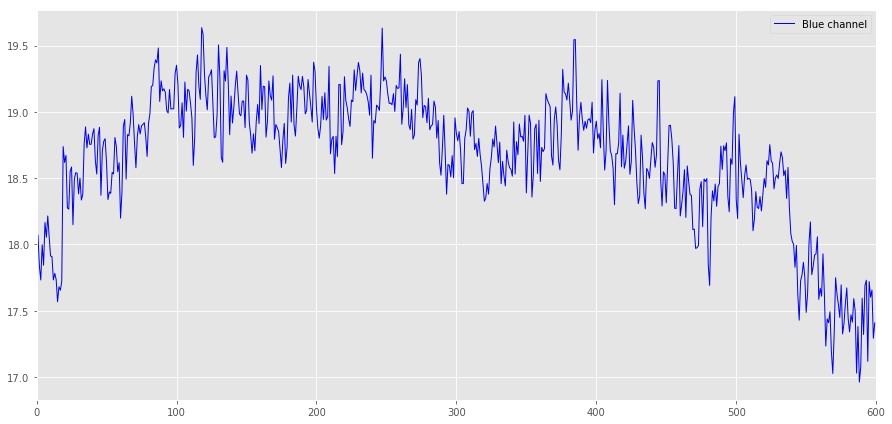

In [14]:
# results
plt.figure(figsize=(12.5,6))
plt.plot(b_mean, "b", linewidth=1, label="Blue channel")

plt.xlim(0, len(b_mean))
plt.legend()
plt.tight_layout()
plt.show()

## Plot Time series for Green channel

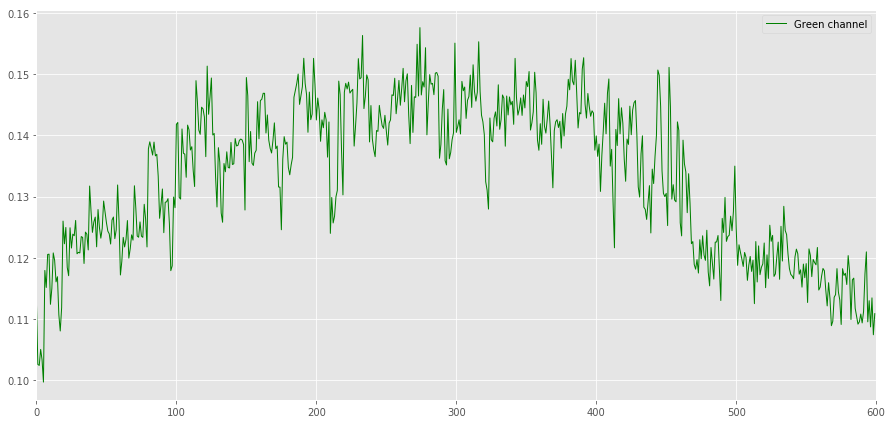

In [15]:
# results
plt.figure(figsize=(12.5,6))
plt.plot(g_mean, "g", linewidth=1, label="Green channel")

plt.xlim(0, len(g_mean))
plt.legend()
plt.tight_layout()
plt.show()

## Plot Time series for Red channel

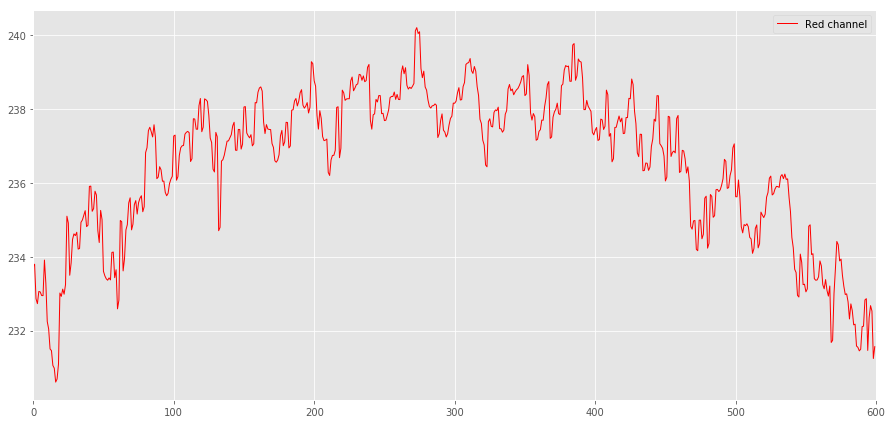

In [16]:
# results
plt.figure(figsize=(12.5,6))
plt.plot(r_mean, "r", linewidth=1, label="Red channel")

plt.xlim(0, len(r_mean))
plt.legend()
plt.tight_layout()
plt.show()

## Plot All Channel

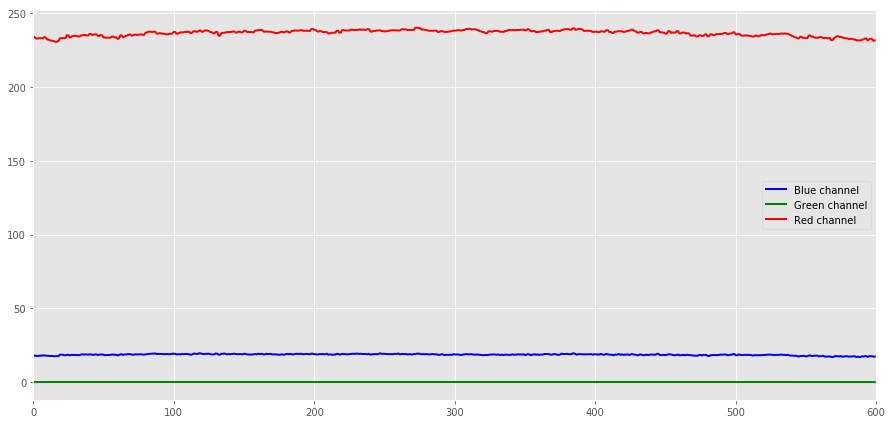

In [17]:
# results
plt.figure(figsize=(12.5,6))
plt.plot(b_mean, "b", linewidth=2, label="Blue channel")
plt.plot(g_mean, "g", linewidth=2, label="Green channel")
plt.plot(r_mean, "r", linewidth=2, label="Red channel")

plt.xlim(0, len(r_mean))
plt.legend()
plt.tight_layout()
plt.show()

# For RED Channel 

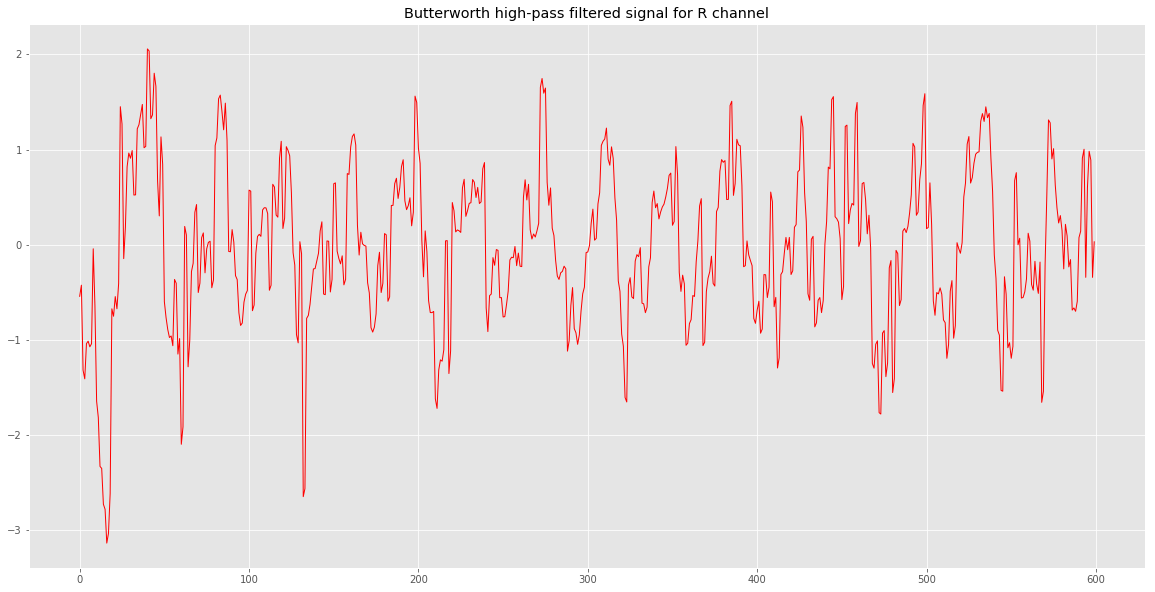

/home/rezwan/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


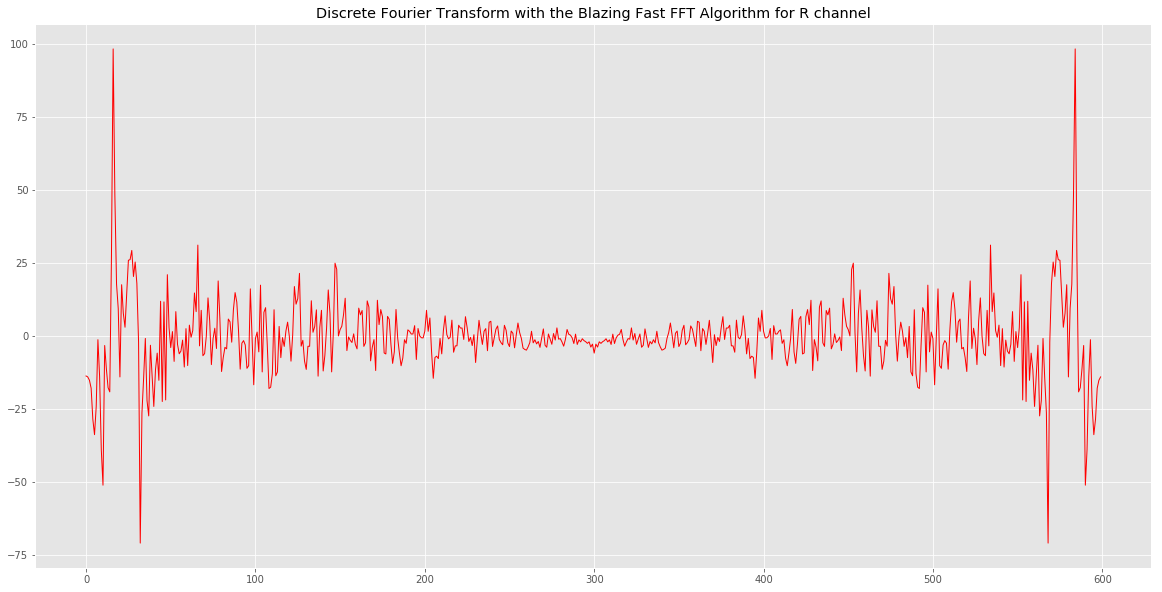

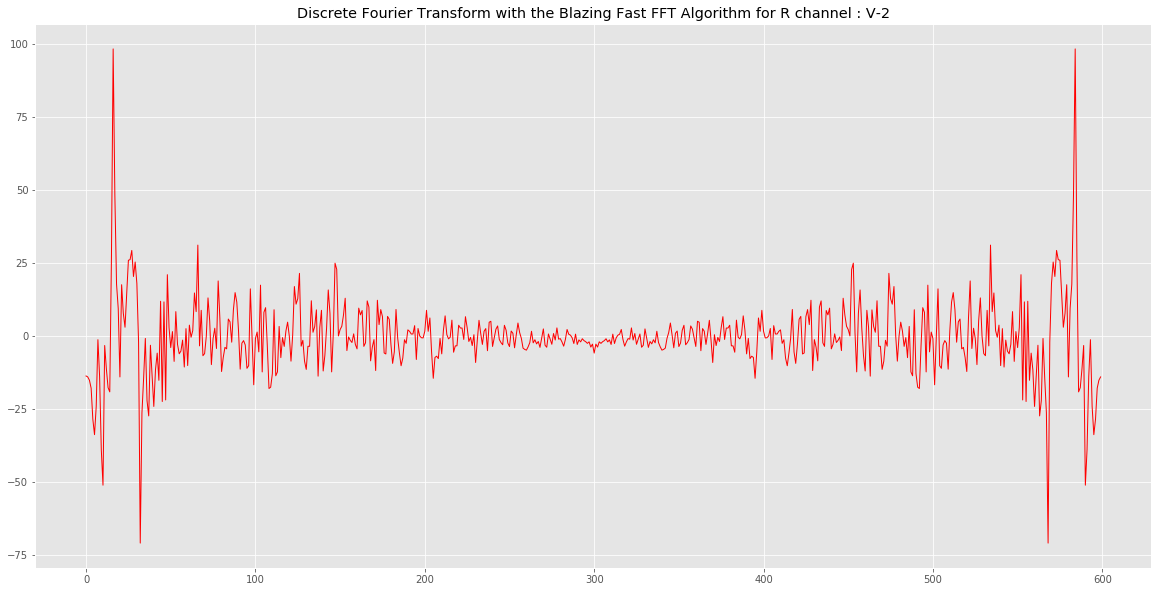

/home/rezwan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:176: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/rezwan/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/rezwan/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


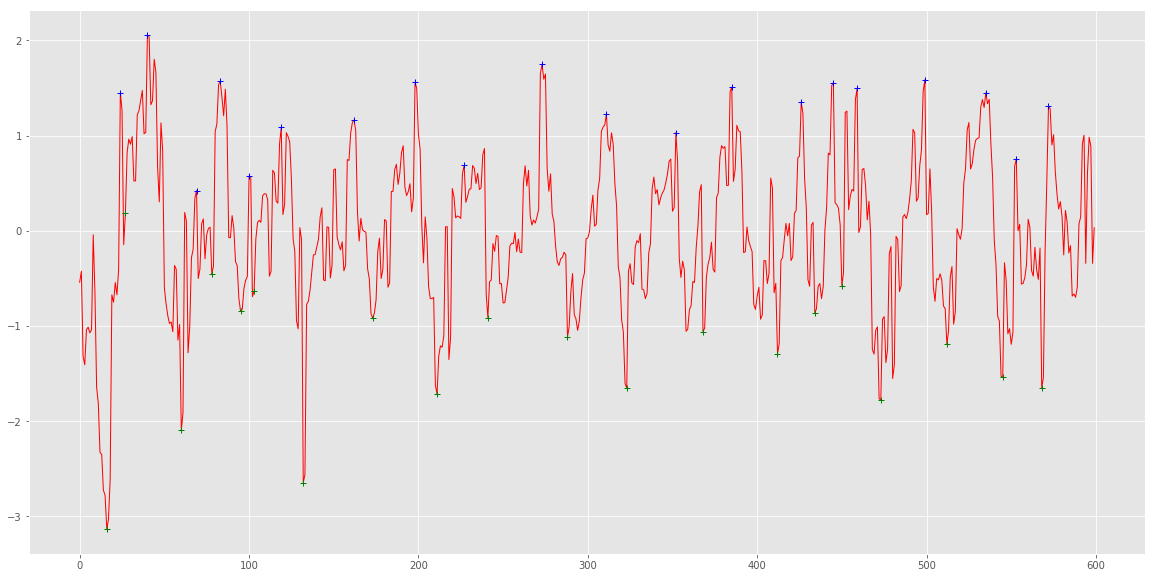

In [21]:
############ Butterworth high-pass filter of order 5 ################

# https://stackoverflow.com/questions/39032325/python-high-pass-filter

import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

fps = 60
filtered = butter_highpass_filter(r_mean,0.5,fps) ### HERE (R channel) ....... 

plt.figure(figsize=(20,10))
plt.tight_layout()
plt.plot(range(len(filtered)),filtered, "r", linewidth=1, label="R channel")
plt.title('Butterworth high-pass filtered signal for R channel')
plt.show()

############## Do the Discrete Fourier Transform with the Blazing Fast FFT Algorithm ###############

# https://github.com/balzer82/FFT-Python/blob/master/FFT-Tutorial.ipynb
fast_FFT = np.fft.fft(filtered)
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.plot(range(len(fast_FFT)),fast_FFT, "r", linewidth=1, label="R channel")
plt.title('Discrete Fourier Transform with the Blazing Fast FFT Algorithm for R channel')
plt.show()

############### Blazing Fast FFT Algorithm #########################
from scipy.fftpack import fft, ifft
fast_FFT_2 = fft(filtered)
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.plot(range(len(fast_FFT_2)),fast_FFT_2, "r", linewidth=1, label="R channel")
plt.title('Discrete Fourier Transform with the Blazing Fast FFT Algorithm for R channel : V-2')
plt.show()




############### Dominant Peak Frq for R Channel ###################################

# https://gist.github.com/gcalmettes/1784428

import numpy as np

def peakdetect(y_axis, x_axis = None, lookahead = 500, delta = 0):
    """
    Converted from/based on a MATLAB script at http://billauer.co.il/peakdet.html
    
    Algorithm for detecting local maximas and minmias in a signal.
    Discovers peaks by searching for values which are surrounded by lower
    or larger values for maximas and minimas respectively
    
    keyword arguments:
    y_axis -- A list containg the signal over which to find peaks
    x_axis -- A x-axis whose values correspond to the 'y_axis' list and is used
        in the return to specify the postion of the peaks. If omitted the index
        of the y_axis is used. (default: None)
    lookahead -- (optional) distance to look ahead from a peak candidate to
        determine if it is the actual peak (default: 500) 
        '(sample / period) / f' where '4 >= f >= 1.25' might be a good value
    delta -- (optional) this specifies a minimum difference between a peak and
        the following points, before a peak may be considered a peak. Useful
        to hinder the algorithm from picking up false peaks towards to end of
        the signal. To work well delta should be set to 'delta >= RMSnoise * 5'.
        (default: 0)
            Delta function causes a 20% decrease in speed, when omitted
            Correctly used it can double the speed of the algorithm
    
    return -- two lists [maxtab, mintab] containing the positive and negative
        peaks respectively. Each cell of the lists contains a tupple of:
        (position, peak_value) 
        to get the average peak value do 'np.mean(maxtab, 0)[1]' on the results
    """
    maxtab = []
    mintab = []
    dump = []   #Used to pop the first hit which always if false
       
    length = len(y_axis)
    if x_axis is None:
        x_axis = range(length)
    
    #perform some checks
    if length != len(x_axis):
        raise ValueError("Input vectors y_axis and x_axis must have same length")
    if lookahead < 1:
        raise ValueError("Lookahead must be above '1' in value")
    if not (np.isscalar(delta) and delta >= 0):
        raise ValueError("delta must be a positive number")
        
#     ValueError("No zero crossings found")
    
    #needs to be a numpy array
    y_axis = np.asarray(y_axis)
    
    #maxima and minima candidates are temporarily stored in
    #mx and mn respectively
    mn, mx = np.Inf, -np.Inf
    
    #Only detect peak if there is 'lookahead' amount of points after it
    for index, (x, y) in enumerate(zip(x_axis[:-lookahead], y_axis[:-lookahead])):
        if y > mx:
            mx = y
            mxpos = x
        if y < mn:
            mn = y
            mnpos = x
        
        ####look for max####
        if y < mx-delta and mx != np.Inf:
            #Maxima peak candidate found
            #look ahead in signal to ensure that this is a peak and not jitter
            if y_axis[index:index+lookahead].max() < mx:
                maxtab.append((mxpos, mx))
                dump.append(True)
                #set algorithm to only find minima now
                mx = np.Inf
                mn = np.Inf
        
        ####look for min####
        if y > mn+delta and mn != -np.Inf:
            #Minima peak candidate found description
            #look ahead in signal to ensure that this is a peak and not jitter
            if y_axis[index:index+lookahead].min() > mn:
                mintab.append((mnpos, mn))
                dump.append(False)
                #set algorithm to only find maxima now
                mn = -np.Inf
                mx = -np.Inf
    
    
    #Remove the false hit on the first value of the y_axis
    try:
        if dump[0]:
            maxtab.pop(0)
            #print "pop max"
        else:
            mintab.pop(0)
            #print "pop min"
        del dump
    except IndexError:
        #no peaks were found, should the function return empty lists?
        pass
    
    return maxtab, mintab


# if __name__=="__main__":
import pylab
from math import pi

y = filtered
x = range(len(filtered))

_max, _min = peakdetect(y,x,10, 0.30)
xm = [p[0] for p in _max]
ym = [p[1] for p in _max]
xn = [p[0] for p in _min]
yn = [p[1] for p in _min]

plt.figure(figsize=(20,10))
plt.tight_layout()
plot = pylab.plot(x,y, "r", linewidth=1, label="R channel")
pylab.hold(True)
pylab.plot(xm, ym, 'b+')
pylab.plot(xn, yn, 'g+')

In [22]:
_max

[(24, 1.4500672403048829),
 (40, 2.056748169030856),
 (69, 0.4224182820380843),
 (83, 1.5714004661251906),
 (100, 0.5739871712106521),
 (119, 1.0865544638455247),
 (162, 1.1641789637111462),
 (198, 1.5607219976079527),
 (227, 0.6876133863915371),
 (273, 1.7460703071513557),
 (311, 1.2253338264793747),
 (352, 1.031133467741056),
 (385, 1.5069763954618058),
 (426, 1.352156861040413),
 (445, 1.5554656049012365),
 (459, 1.494266317033993),
 (499, 1.5862212877414639),
 (535, 1.4484926687972988),
 (553, 0.7571921011628302),
 (572, 1.3109848863577964)]

In [25]:
np.max(_max[1])

40.0

In [23]:
_min

[(16, -3.132740895633934),
 (27, 0.18577345530951273),
 (60, -2.095076091035374),
 (78, -0.4512620657561778),
 (95, -0.8471095877177042),
 (103, -0.631978345601405),
 (132, -2.645007424827345),
 (173, -0.9170296547198884),
 (211, -1.7182125240903863),
 (241, -0.9117654922494722),
 (288, -1.116998253651015),
 (323, -1.650771682203367),
 (368, -1.0586604634863215),
 (412, -1.2940942008072365),
 (434, -0.8623205476852152),
 (450, -0.5759074893899724),
 (473, -1.777523621225022),
 (512, -1.1922328092718297),
 (545, -1.5374937760266094),
 (568, -1.6546390168775602)]

In [27]:
np.min(_min)

-3.132740895633934

# For Green Channel

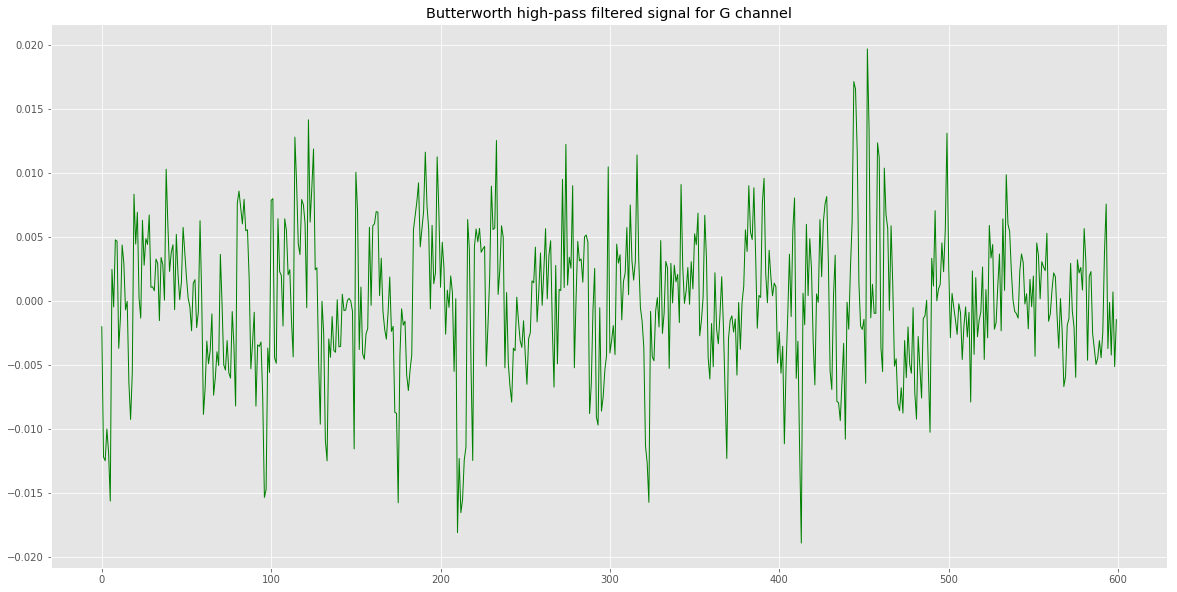

/home/rezwan/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


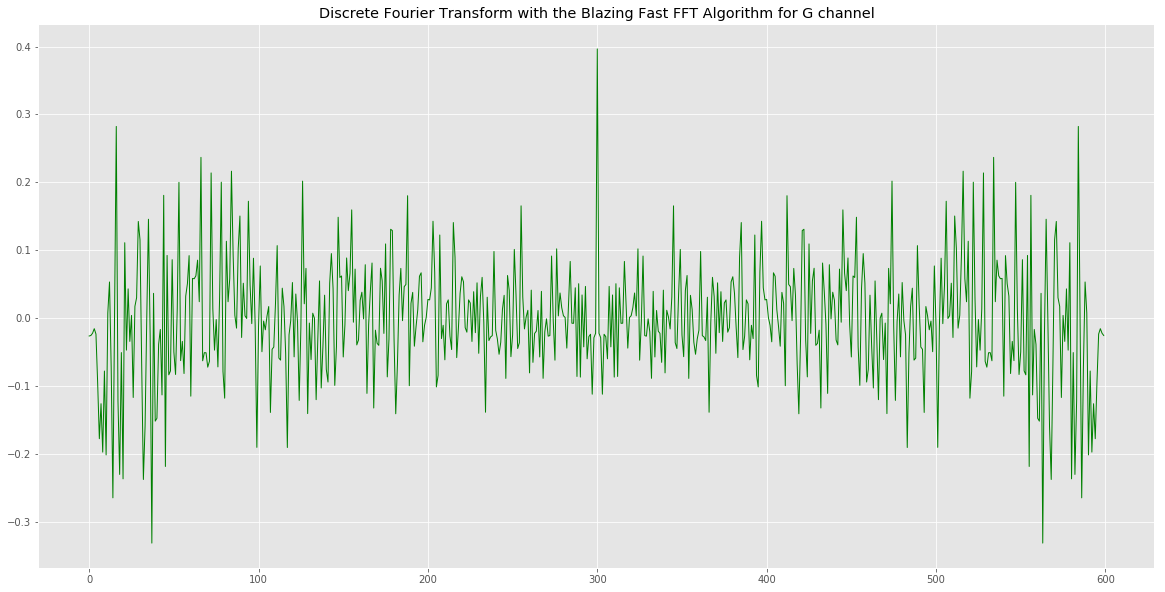

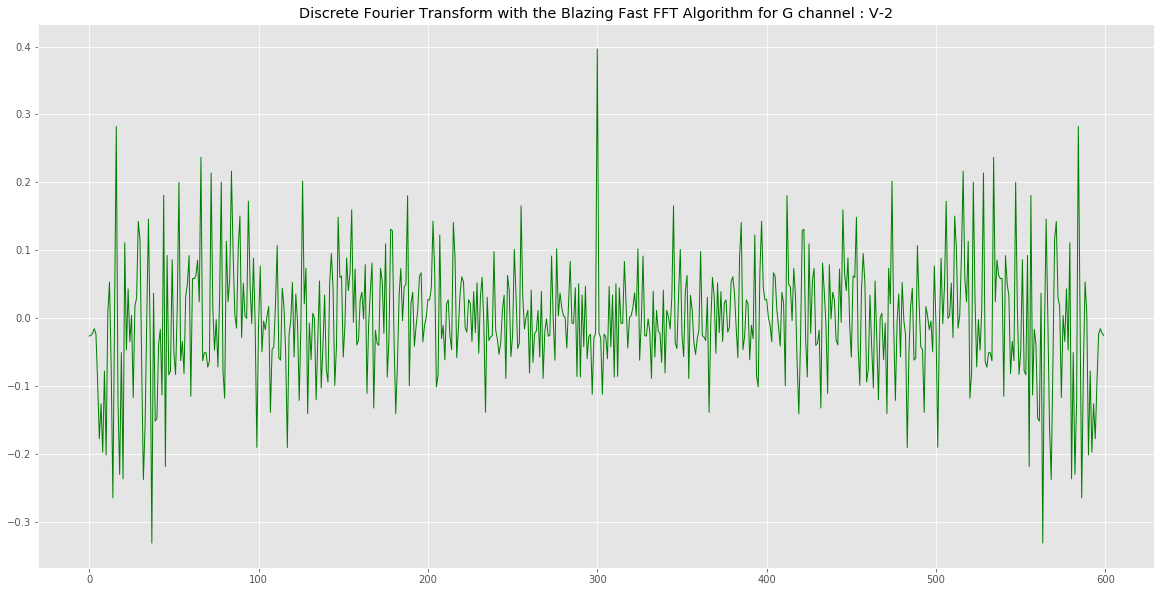

/home/rezwan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:177: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/rezwan/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/rezwan/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


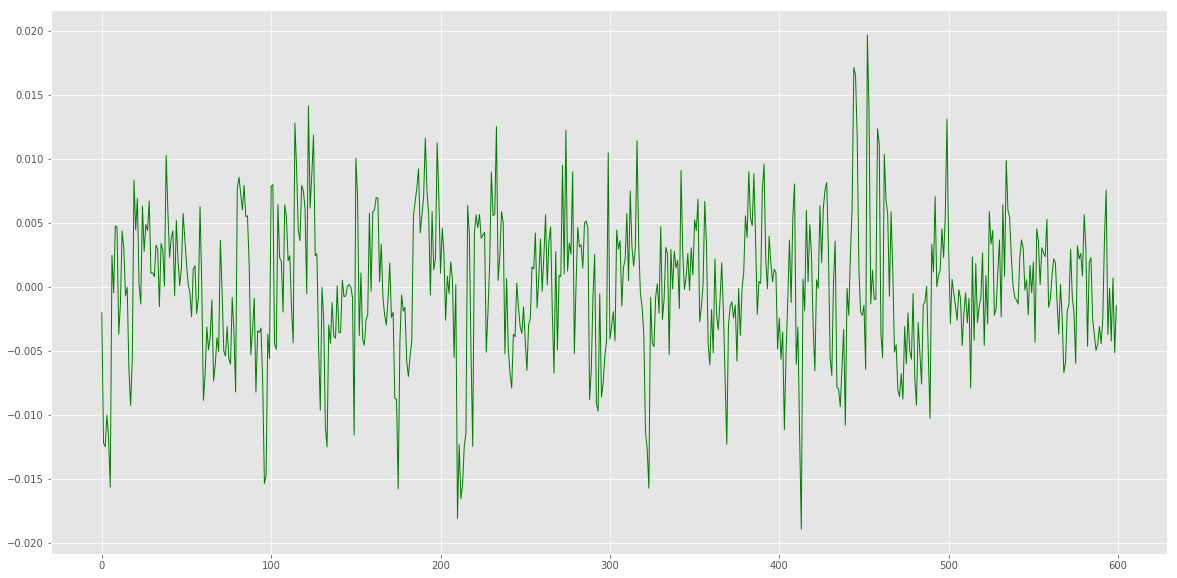

In [28]:
############ Butterworth high-pass filter of order 5 ################

# https://stackoverflow.com/questions/39032325/python-high-pass-filter

import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

fps = 60
filtered = butter_highpass_filter(g_mean,0.5,fps) ### HERE (G channel) ....... 

plt.figure(figsize=(20,10))
plt.tight_layout()
plt.plot(range(len(filtered)),filtered, "g", linewidth=1, label="Green channel")
#plt.plot(r_mean, "r", linewidth=2, label="Red channel")
plt.title('Butterworth high-pass filtered signal for G channel')
plt.show()

############## Do the Discrete Fourier Transform with the Blazing Fast FFT Algorithm ###############

# https://github.com/balzer82/FFT-Python/blob/master/FFT-Tutorial.ipynb
fast_FFT = np.fft.fft(filtered)
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.plot(range(len(fast_FFT)),fast_FFT, "g", linewidth=1, label="Green channel")
plt.title('Discrete Fourier Transform with the Blazing Fast FFT Algorithm for G channel')
plt.show()

############### Blazing Fast FFT Algorithm #########################
from scipy.fftpack import fft, ifft
fast_FFT_2 = fft(filtered)
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.plot(range(len(fast_FFT_2)),fast_FFT_2, "g", linewidth=1, label="Green channel")
plt.title('Discrete Fourier Transform with the Blazing Fast FFT Algorithm for G channel : V-2')
plt.show()




############### Dominant Peak Frq for R Channel ###################################

# https://gist.github.com/gcalmettes/1784428

import numpy as np

def peakdetect(y_axis, x_axis = None, lookahead = 500, delta = 0):
    """
    Converted from/based on a MATLAB script at http://billauer.co.il/peakdet.html
    
    Algorithm for detecting local maximas and minmias in a signal.
    Discovers peaks by searching for values which are surrounded by lower
    or larger values for maximas and minimas respectively
    
    keyword arguments:
    y_axis -- A list containg the signal over which to find peaks
    x_axis -- A x-axis whose values correspond to the 'y_axis' list and is used
        in the return to specify the postion of the peaks. If omitted the index
        of the y_axis is used. (default: None)
    lookahead -- (optional) distance to look ahead from a peak candidate to
        determine if it is the actual peak (default: 500) 
        '(sample / period) / f' where '4 >= f >= 1.25' might be a good value
    delta -- (optional) this specifies a minimum difference between a peak and
        the following points, before a peak may be considered a peak. Useful
        to hinder the algorithm from picking up false peaks towards to end of
        the signal. To work well delta should be set to 'delta >= RMSnoise * 5'.
        (default: 0)
            Delta function causes a 20% decrease in speed, when omitted
            Correctly used it can double the speed of the algorithm
    
    return -- two lists [maxtab, mintab] containing the positive and negative
        peaks respectively. Each cell of the lists contains a tupple of:
        (position, peak_value) 
        to get the average peak value do 'np.mean(maxtab, 0)[1]' on the results
    """
    maxtab = []
    mintab = []
    dump = []   #Used to pop the first hit which always if false
       
    length = len(y_axis)
    if x_axis is None:
        x_axis = range(length)
    
    #perform some checks
    if length != len(x_axis):
        raise ValueError("Input vectors y_axis and x_axis must have same length")
    if lookahead < 1:
        raise ValueError("Lookahead must be above '1' in value")
    if not (np.isscalar(delta) and delta >= 0):
        raise ValueError("delta must be a positive number")
        
#     ValueError("No zero crossings found")
    
    #needs to be a numpy array
    y_axis = np.asarray(y_axis)
    
    #maxima and minima candidates are temporarily stored in
    #mx and mn respectively
    mn, mx = np.Inf, -np.Inf
    
    #Only detect peak if there is 'lookahead' amount of points after it
    for index, (x, y) in enumerate(zip(x_axis[:-lookahead], y_axis[:-lookahead])):
        if y > mx:
            mx = y
            mxpos = x
        if y < mn:
            mn = y
            mnpos = x
        
        ####look for max####
        if y < mx-delta and mx != np.Inf:
            #Maxima peak candidate found
            #look ahead in signal to ensure that this is a peak and not jitter
            if y_axis[index:index+lookahead].max() < mx:
                maxtab.append((mxpos, mx))
                dump.append(True)
                #set algorithm to only find minima now
                mx = np.Inf
                mn = np.Inf
        
        ####look for min####
        if y > mn+delta and mn != -np.Inf:
            #Minima peak candidate found description
            #look ahead in signal to ensure that this is a peak and not jitter
            if y_axis[index:index+lookahead].min() > mn:
                mintab.append((mnpos, mn))
                dump.append(False)
                #set algorithm to only find maxima now
                mn = -np.Inf
                mx = -np.Inf
    
    
    #Remove the false hit on the first value of the y_axis
    try:
        if dump[0]:
            maxtab.pop(0)
            #print "pop max"
        else:
            mintab.pop(0)
            #print "pop min"
        del dump
    except IndexError:
        #no peaks were found, should the function return empty lists?
        pass
    
    return maxtab, mintab


# if __name__=="__main__":
import pylab
from math import pi

y = filtered
x = range(len(filtered))

_max, _min = peakdetect(y,x, 10, 0.30)
xm = [p[0] for p in _max]
ym = [p[1] for p in _max]
xn = [p[0] for p in _min]
yn = [p[1] for p in _min]

plt.figure(figsize=(20,10))
plt.tight_layout()
plot = pylab.plot(x,y, "g", linewidth=1, label="Green channel")
pylab.hold(True)
pylab.plot(xm, ym, 'b+')
pylab.plot(xn, yn, 'r+')

In [29]:
_max

[]

In [30]:
_min

[]

# For Blue Channel 

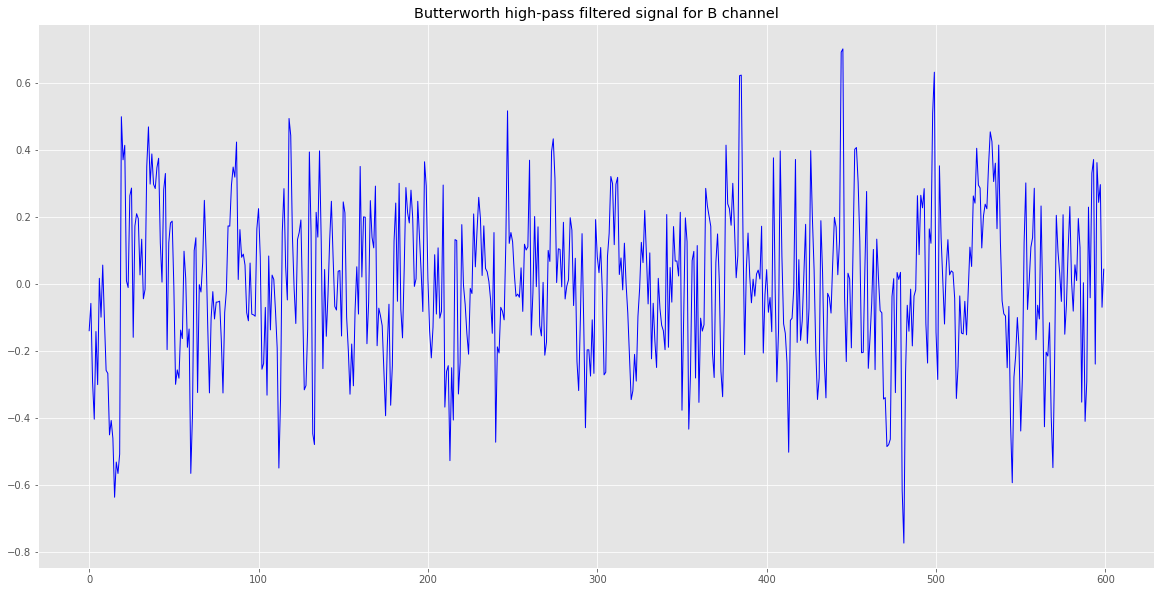

/home/rezwan/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


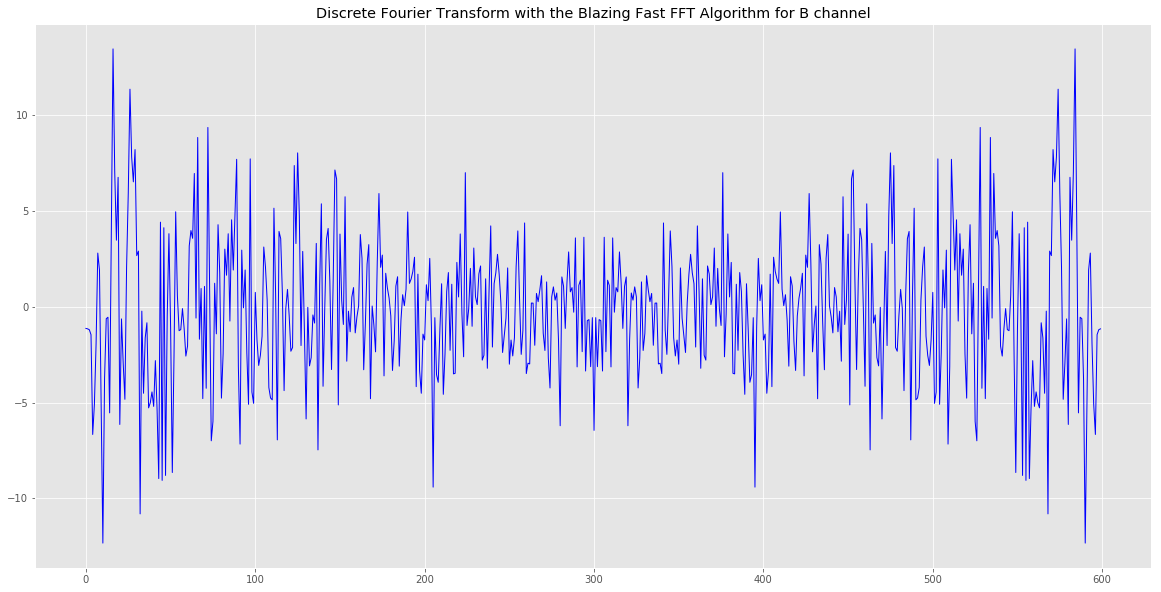

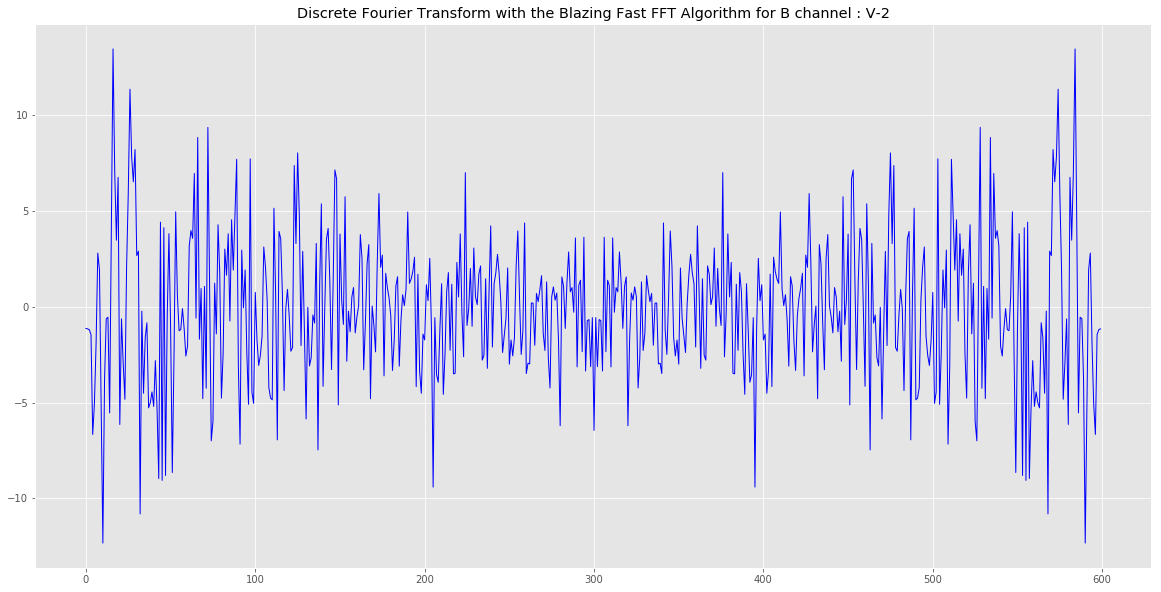

/home/rezwan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:177: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/rezwan/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/rezwan/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


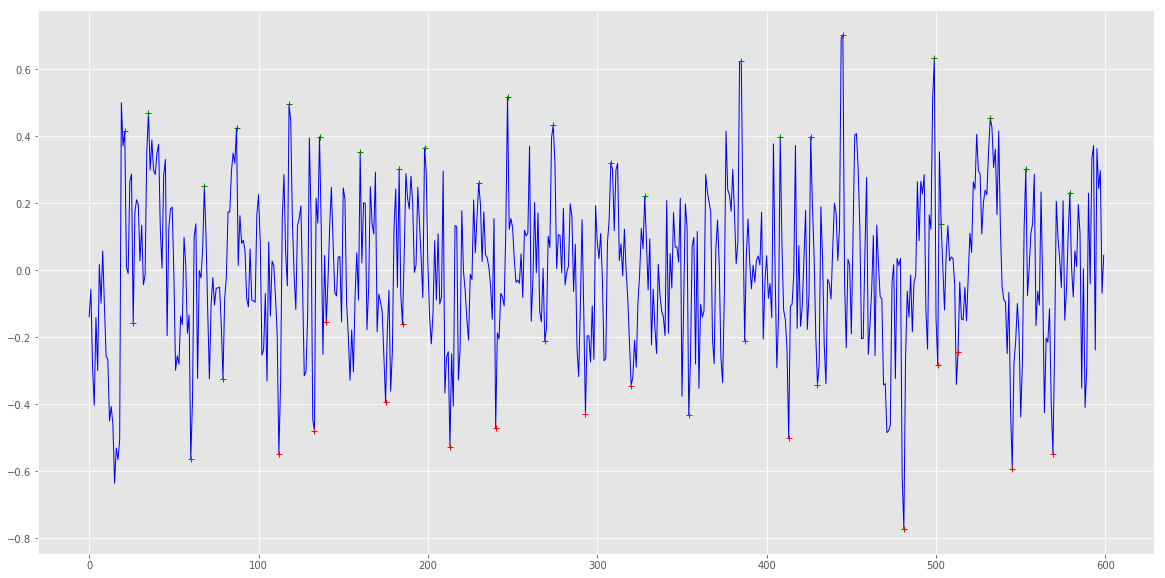

In [31]:
############ Butterworth high-pass filter of order 5 ################

# https://stackoverflow.com/questions/39032325/python-high-pass-filter

import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

fps = 60
filtered = butter_highpass_filter(b_mean,0.5,fps) ### HERE (B channel) ....... 

plt.figure(figsize=(20,10))
plt.tight_layout()
plt.plot(range(len(filtered)),filtered, "b", linewidth=1, label="Blue channel")
#plt.plot(r_mean, "r", linewidth=2, label="Red channel")
plt.title('Butterworth high-pass filtered signal for B channel')
plt.show()

############## Do the Discrete Fourier Transform with the Blazing Fast FFT Algorithm ###############

# https://github.com/balzer82/FFT-Python/blob/master/FFT-Tutorial.ipynb
fast_FFT = np.fft.fft(filtered)
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.plot(range(len(fast_FFT)),fast_FFT, "b", linewidth=1, label="Blue channel")
plt.title('Discrete Fourier Transform with the Blazing Fast FFT Algorithm for B channel')
plt.show()

############### Blazing Fast FFT Algorithm #########################
from scipy.fftpack import fft, ifft
fast_FFT_2 = fft(filtered)
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.plot(range(len(fast_FFT_2)),fast_FFT_2, "b", linewidth=1, label="Blue channel")
plt.title('Discrete Fourier Transform with the Blazing Fast FFT Algorithm for B channel : V-2')
plt.show()




############### Dominant Peak Frq for R Channel ###################################

# https://gist.github.com/gcalmettes/1784428

import numpy as np

def peakdetect(y_axis, x_axis = None, lookahead = 500, delta = 0):
    """
    Converted from/based on a MATLAB script at http://billauer.co.il/peakdet.html
    
    Algorithm for detecting local maximas and minmias in a signal.
    Discovers peaks by searching for values which are surrounded by lower
    or larger values for maximas and minimas respectively
    
    keyword arguments:
    y_axis -- A list containg the signal over which to find peaks
    x_axis -- A x-axis whose values correspond to the 'y_axis' list and is used
        in the return to specify the postion of the peaks. If omitted the index
        of the y_axis is used. (default: None)
    lookahead -- (optional) distance to look ahead from a peak candidate to
        determine if it is the actual peak (default: 500) 
        '(sample / period) / f' where '4 >= f >= 1.25' might be a good value
    delta -- (optional) this specifies a minimum difference between a peak and
        the following points, before a peak may be considered a peak. Useful
        to hinder the algorithm from picking up false peaks towards to end of
        the signal. To work well delta should be set to 'delta >= RMSnoise * 5'.
        (default: 0)
            Delta function causes a 20% decrease in speed, when omitted
            Correctly used it can double the speed of the algorithm
    
    return -- two lists [maxtab, mintab] containing the positive and negative
        peaks respectively. Each cell of the lists contains a tupple of:
        (position, peak_value) 
        to get the average peak value do 'np.mean(maxtab, 0)[1]' on the results
    """
    maxtab = []
    mintab = []
    dump = []   #Used to pop the first hit which always if false
       
    length = len(y_axis)
    if x_axis is None:
        x_axis = range(length)
    
    #perform some checks
    if length != len(x_axis):
        raise ValueError("Input vectors y_axis and x_axis must have same length")
    if lookahead < 1:
        raise ValueError("Lookahead must be above '1' in value")
    if not (np.isscalar(delta) and delta >= 0):
        raise ValueError("delta must be a positive number")
        
#     ValueError("No zero crossings found")
    
    #needs to be a numpy array
    y_axis = np.asarray(y_axis)
    
    #maxima and minima candidates are temporarily stored in
    #mx and mn respectively
    mn, mx = np.Inf, -np.Inf
    
    #Only detect peak if there is 'lookahead' amount of points after it
    for index, (x, y) in enumerate(zip(x_axis[:-lookahead], y_axis[:-lookahead])):
        if y > mx:
            mx = y
            mxpos = x
        if y < mn:
            mn = y
            mnpos = x
        
        ####look for max####
        if y < mx-delta and mx != np.Inf:
            #Maxima peak candidate found
            #look ahead in signal to ensure that this is a peak and not jitter
            if y_axis[index:index+lookahead].max() < mx:
                maxtab.append((mxpos, mx))
                dump.append(True)
                #set algorithm to only find minima now
                mx = np.Inf
                mn = np.Inf
        
        ####look for min####
        if y > mn+delta and mn != -np.Inf:
            #Minima peak candidate found description
            #look ahead in signal to ensure that this is a peak and not jitter
            if y_axis[index:index+lookahead].min() > mn:
                mintab.append((mnpos, mn))
                dump.append(False)
                #set algorithm to only find maxima now
                mn = -np.Inf
                mx = -np.Inf
    
    
    #Remove the false hit on the first value of the y_axis
    try:
        if dump[0]:
            maxtab.pop(0)
            #print "pop max"
        else:
            mintab.pop(0)
            #print "pop min"
        del dump
    except IndexError:
        #no peaks were found, should the function return empty lists?
        pass
    
    return maxtab, mintab


# if __name__=="__main__":
import pylab
from math import pi

y = filtered
x = range(len(filtered))

_max, _min = peakdetect(y,x, 10, 0.30)
xm = [p[0] for p in _max]
ym = [p[1] for p in _max]
xn = [p[0] for p in _min]
yn = [p[1] for p in _min]

plt.figure(figsize=(20,10))
plt.tight_layout()
plot = pylab.plot(x,y, "b", linewidth=1, label="Blue channel")
pylab.hold(True)
pylab.plot(xm, ym, 'g+')
pylab.plot(xn, yn, 'r+')